In [1]:
# First let us load the datasets into different Dataframes
import pandas as pd
def load_data(datapath):
    data = pd.read_csv(datapath)
   # Dimensions
    print('Shape:', data.shape)
    # Set of features we have are: date, store, and item
    display(data.sample(10))
    return data
traindf=load_data('train.csv')
featuresdf=load_data('features.csv')
storesdf=load_data('stores.csv')

Shape: (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
186787,19,95,2011-05-06,102730.81,False
124378,13,54,2011-05-06,97.76,False
287488,30,7,2011-12-23,690.55,False
120950,13,25,2011-08-26,15391.70,False
349197,37,23,2012-09-14,28.18,False
225702,23,90,2010-12-17,26486.78,False
182977,19,46,2011-02-18,21697.92,False
273241,28,52,2010-12-24,3519.78,False
350033,37,40,2011-12-16,26733.10,False
182883,19,44,2012-08-03,5237.81,False


Shape: (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1803,10,2013-04-05,70.74,3.808,9965.99,4803.63,766.72,3310.09,2541.31,132.653774,6.791,False
7745,43,2012-01-13,43.68,3.261,894.04,209.71,32.36,NaN,1191.88,211.411571,9.653,False
3644,21,2010-03-05,48.61,2.625,NaN,NaN,NaN,NaN,NaN,211.006754,8.324,False
4847,27,2012-04-20,62.62,4.170,12507.63,2681.10,99.95,1433.43,3244.98,141.901526,8.253,False
7004,39,2011-10-14,73.79,3.274,NaN,NaN,NaN,NaN,NaN,216.088526,7.716,False
5009,28,2011-12-02,52.50,3.701,10392.61,75.00,2241.11,6243.02,19374.19,129.845967,12.890,False
5072,28,2013-02-15,47.12,3.924,14659.05,4653.27,12.38,682.04,9065.86,132.272571,9.910,False
2001,11,2013-07-26,85.64,3.620,2387.21,717.20,106.70,1084.84,3264.52,NaN,NaN,False
4214,24,2010-08-20,72.17,2.913,NaN,NaN,NaN,NaN,NaN,132.661613,8.117,False
1158,7,2011-05-13,36.61,3.767,NaN,NaN,NaN,NaN,NaN,192.826069,8.595,False


Shape: (45, 3)


,Store,Type,Size
38,39,A,184109
19,20,A,203742
44,45,B,118221
17,18,B,120653
4,5,B,34875
0,1,A,151315
35,36,A,39910
10,11,A,207499
22,23,B,114533
26,27,A,204184


# DATA PREPARATION & ANALYSIS

 *Merging the features and training data to get cumulative insights from overall*

In [2]:
traindf1=traindf.merge(featuresdf,how='left',indicator=True).merge(storesdf,how='left')

In [3]:
traindf1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,both,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,both,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,both,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,both,B,118221


_Markdown values contains 58% null values_

In [4]:
traindf2=traindf1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)  

_trainf2 is dropping columns Markdown1,Markdown2,Markdown3,Markdown4,Markdown5 which has major NaN (Null Values) in trainf1_

In [5]:
traindf2.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
_merge          0
Type            0
Size            0
dtype: int64

*Let's check any outliers on sales values*

In [6]:
Q1 = traindf2['Weekly_Sales'].quantile(0.25)
Q3 =traindf2['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = traindf2[(traindf2['Weekly_Sales'] < lower_bound) | (traindf2['Weekly_Sales'] > upper_bound)]
outliers

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
8,1,1,2010-04-02,57258.43,False,62.27,2.719,210.820450,7.808,both,A,151315
46,1,1,2010-12-24,55931.23,False,52.33,2.886,211.405122,7.838,both,A,151315
63,1,1,2011-04-22,50510.31,False,72.99,3.807,215.459905,7.682,both,A,151315
106,1,1,2012-02-17,54060.10,False,45.32,3.510,220.425759,7.348,both,A,151315
113,1,1,2012-04-06,57592.12,False,70.43,3.891,221.435611,7.143,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
421285,45,95,2012-09-28,49380.11,False,64.88,3.997,192.013558,8.684,both,B,118221
421286,45,95,2012-10-05,50241.01,False,64.89,3.985,192.170412,8.667,both,B,118221
421287,45,95,2012-10-12,49334.77,False,54.47,4.000,192.327265,8.667,both,B,118221
421288,45,95,2012-10-19,48434.97,False,56.47,3.969,192.330854,8.667,both,B,118221


In [7]:
traindf2.loc[traindf2['Weekly_Sales']<=0] # Negative values

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,both,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,both,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,both,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,both,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,181.982317,8.992,both,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,182.034782,8.992,both,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,181.692477,8.899,both,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,182.318780,8.743,both,B,118221


In [8]:
traindf3=traindf2.loc[traindf2['Weekly_Sales']>0]  #Removing the Negative values
traindf4=traindf3.drop(['_merge'],axis=1)

In [9]:
traindf4.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
140804,15,21,2010-02-05,3253.19,False,19.83,2.954,131.527903,8.350,B,123737
140661,15,20,2010-02-05,4606.90,False,19.83,2.954,131.527903,8.350,B,123737
140518,15,19,2010-02-05,1381.40,False,19.83,2.954,131.527903,8.350,B,123737
140408,15,18,2010-02-05,2239.25,False,19.83,2.954,131.527903,8.350,B,123737
...,...,...,...,...,...,...,...,...,...,...,...
173673,18,52,2012-10-26,2226.10,False,56.09,3.917,138.728161,8.243,B,120653
342211,36,16,2012-10-26,564.50,False,74.39,3.494,222.113657,6.228,A,39910
390158,41,92,2012-10-26,131128.24,False,41.80,3.686,199.219532,6.195,A,196321
175485,18,81,2012-10-26,14036.52,False,56.09,3.917,138.728161,8.243,B,120653


In [10]:
traindf4['Type'].unique() #Store varities

array(['A', 'B', 'C'], dtype=object)

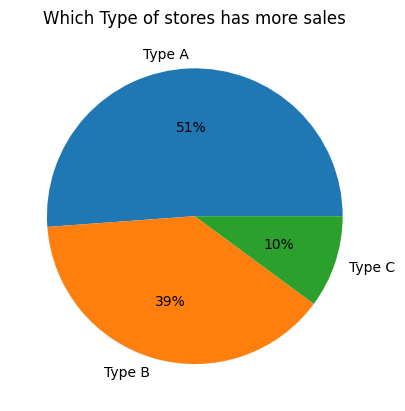

In [11]:
# Contribution of each type of store
import matplotlib.pyplot as plt

# Creating dataset
stores = ['Type A','Type B','Type C']

data = traindf4['Type'].value_counts()

# Creating plot
fig, ax = plt.subplots()
plt.pie(data, labels = stores,autopct='%.0f%%')
ax.set_title('Which Type of stores has more sales')
# show plot
plt.show()


In [12]:
traindf4['year'] = pd.DatetimeIndex(traindf4['Date']).year #Separating year data.

In [13]:
traindf4['month'] = pd.DatetimeIndex(traindf4['Date']).month #extract month data

In [14]:
traindf4['week'] = pd.DatetimeIndex(traindf4['Date']).month #extract week data

In [15]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns

# import file with data
data = traindf4

# Correlation between the data
data.corr(numeric_only=True)


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,year,month,week
Store,1.000000,0.024258,-0.085117,-0.000522,-0.050230,0.065321,-0.211261,0.208759,-0.182763,0.002831,0.000907,0.000907
Dept,0.024258,1.000000,0.148749,0.000663,0.004727,0.003544,-0.007178,0.007787,-0.002491,0.003716,0.000800,0.000800
Weekly_Sales,-0.085117,0.148749,1.000000,0.012843,-0.002339,0.000089,-0.021162,-0.025806,0.244117,-0.010015,0.028401,0.028401
IsHoliday,-0.000522,0.000663,0.012843,1.000000,-0.155775,-0.078155,-0.001933,0.010555,0.000797,-0.056572,0.123058,0.123058
Temperature,-0.050230,0.004727,-0.002339,-0.155775,1.000000,0.143700,0.182223,0.096768,-0.058413,0.065712,0.235957,0.235957
Fuel_Price,0.065321,0.003544,0.000089,-0.078155,0.143700,1.000000,-0.164199,-0.033915,0.003632,0.779681,-0.040931,-0.040931
CPI,-0.211261,-0.007178,-0.021162,-0.001933,0.182223,-0.164199,1.000000,-0.299887,-0.003903,0.074547,0.005366,0.005366
Unemployment,0.208759,0.007787,-0.025806,0.010555,0.096768,-0.033915,-0.299887,1.000000,-0.068335,-0.237210,-0.012562,-0.012562
Size,-0.182763,-0.002491,0.244117,0.000797,-0.058413,0.003632,-0.003903,-0.068335,1.000000,-0.004716,-0.001051,-0.001051
year,0.002831,0.003716,-0.010015,-0.056572,0.065712,0.779681,0.074547,-0.237210,-0.004716,1.000000,-0.194295,-0.194295


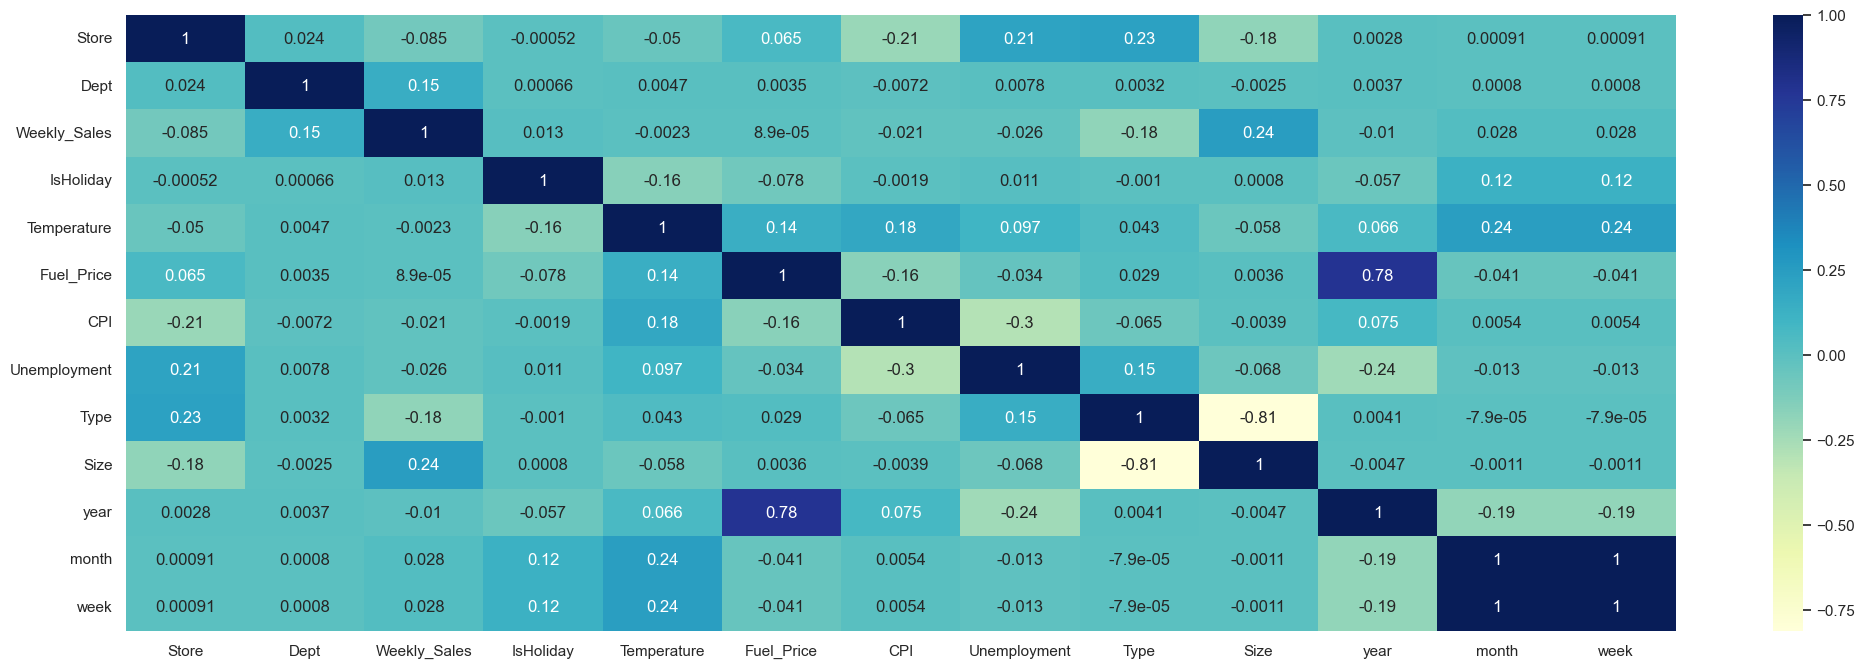

In [54]:
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(30,15)})

# displaying heatmap
mp.show()


In [17]:
print(traindf4.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
year              int32
month             int32
week              int32
dtype: object


**Year vs Fuel_price**

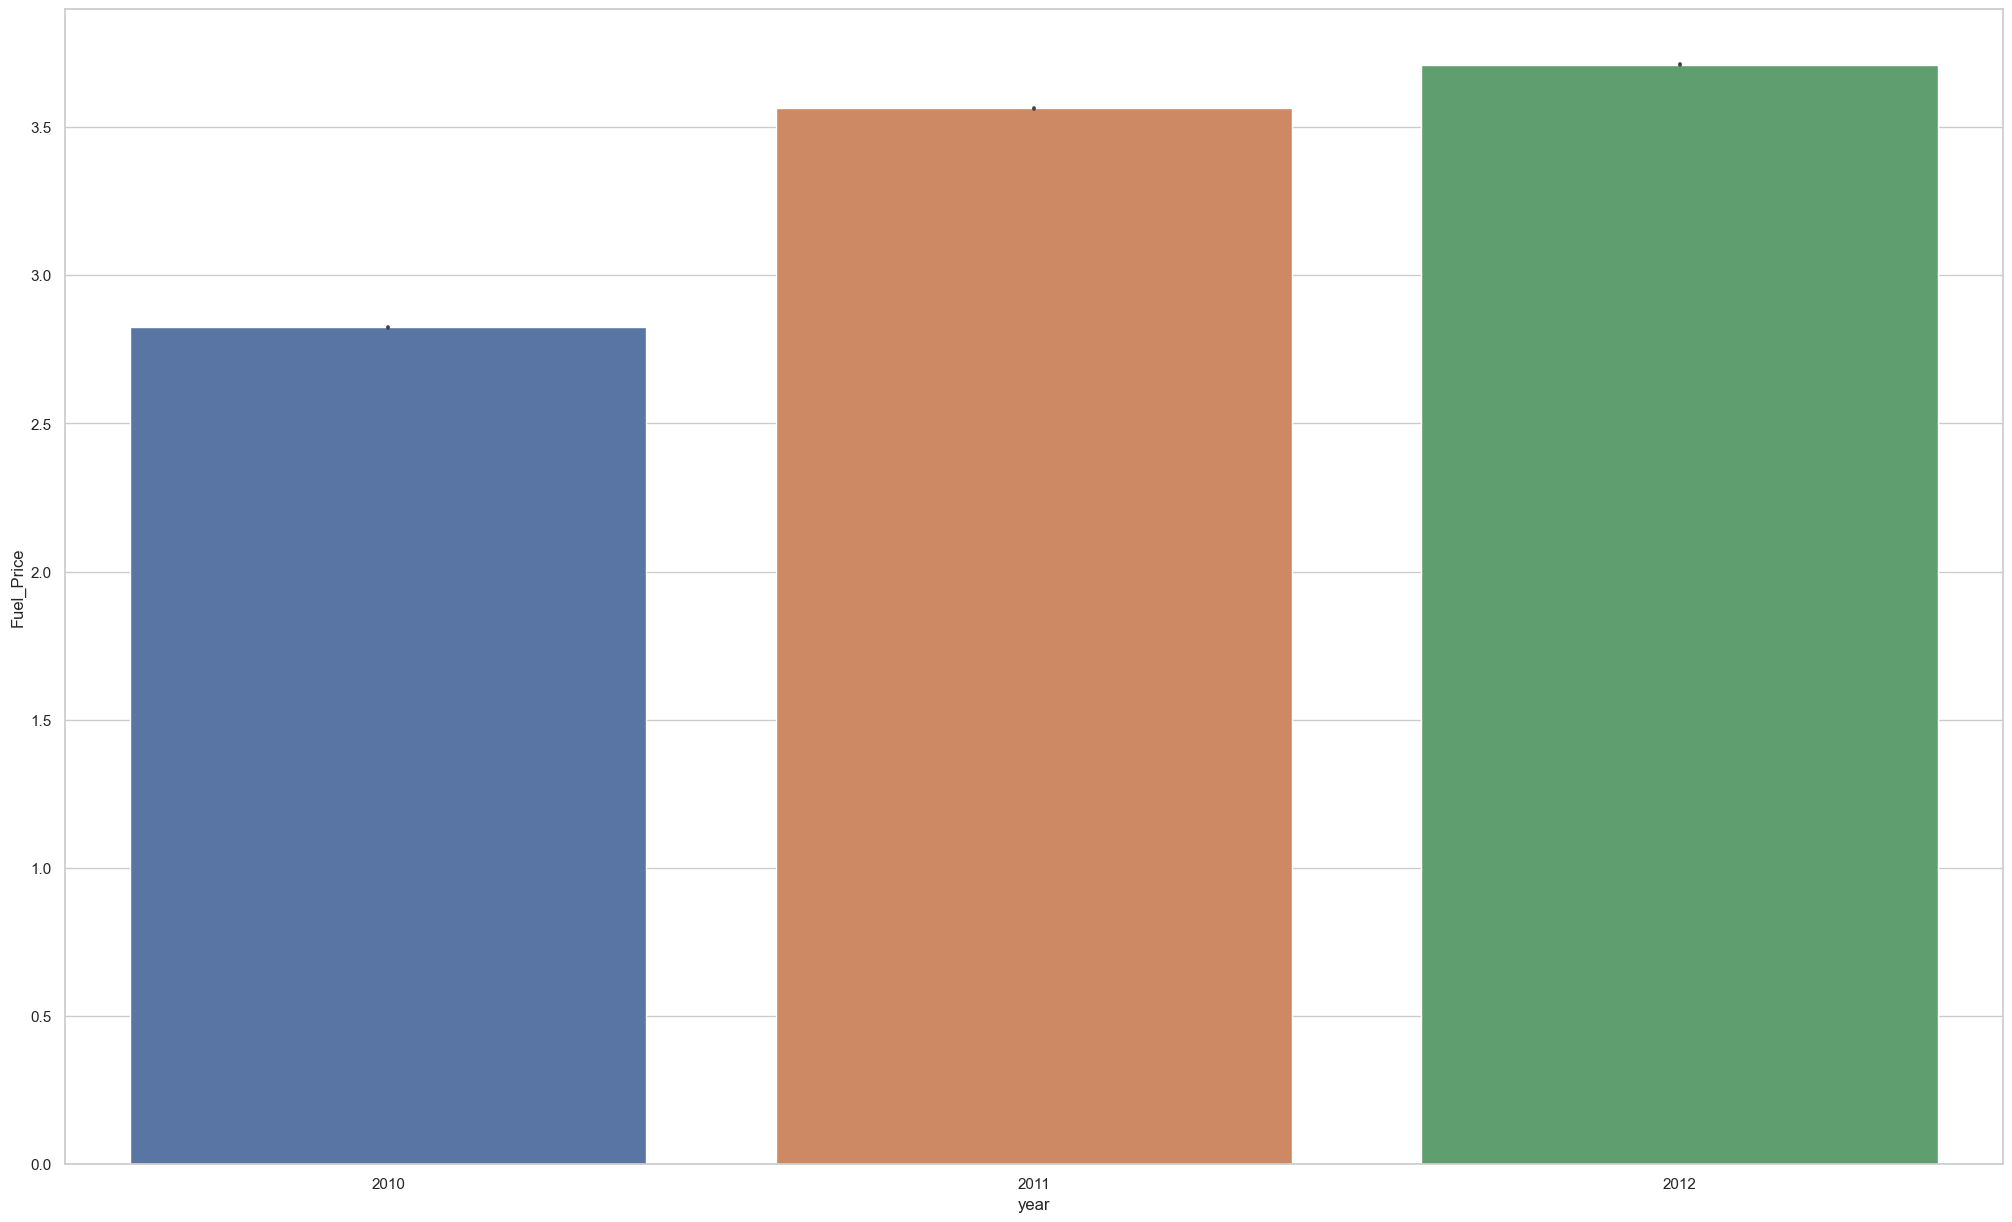

In [18]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips =traindf4
ax = sns.barplot(x="year", y="Fuel_Price", data=tips)
sns.set(rc = {'figure.figsize':(10,4)})


**Weekly sales vs Store**

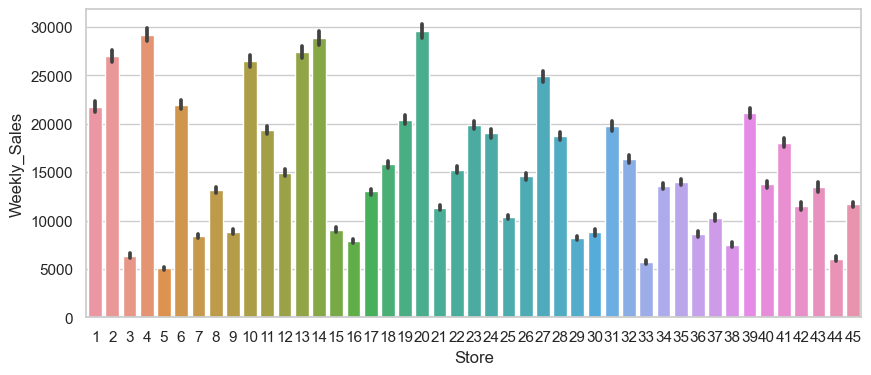

In [19]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = traindf4
ax = sns.barplot(x='Store', y="Weekly_Sales", data=tips)

**Store vs Unemployment**

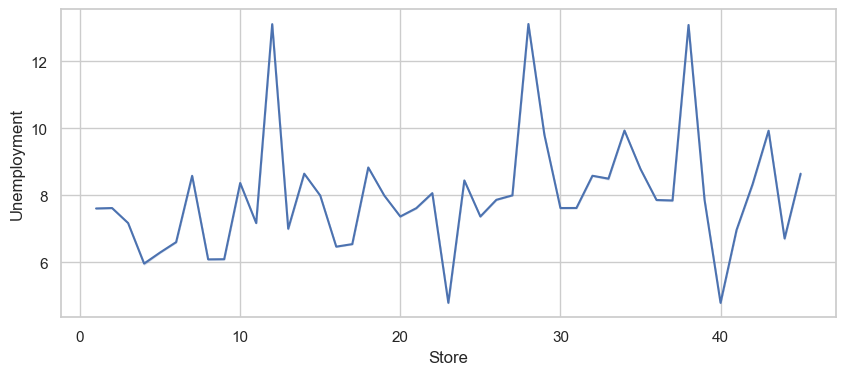

In [20]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = traindf4

# draw lineplot
sns.lineplot(x="Store", y="Unemployment", data=data)
plt.show()


In [21]:
traindf4

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,2012,9,9
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,2012,10,10
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,2012,10,10
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,2012,10,10


In [22]:
traindf4['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65], dtype=int64)

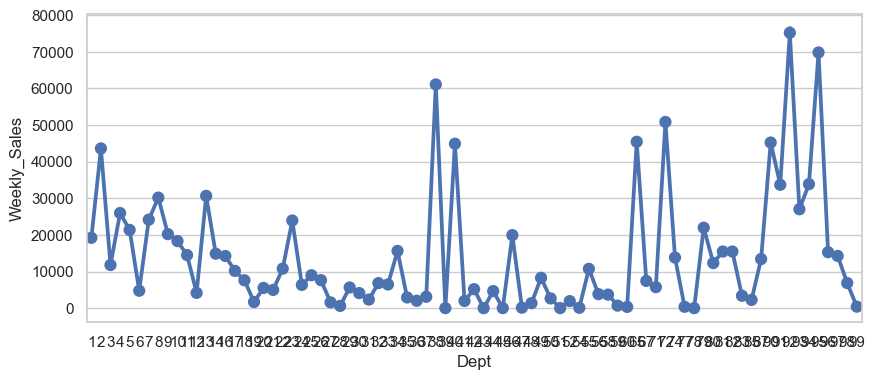

In [23]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data =traindf4

# draw pointplot
sns.pointplot(x ='Dept',y = "Weekly_Sales",data = data)
# show the plot
sns.set(rc = {'figure.figsize':(25,8)})
plt.show()


In [24]:
traindf4

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221,2012,9,9
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221,2012,10,10
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,2012,10,10
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221,2012,10,10


In [25]:
traindf5=traindf4.drop(['Date'],axis=1)

<Axes: xlabel='month'>

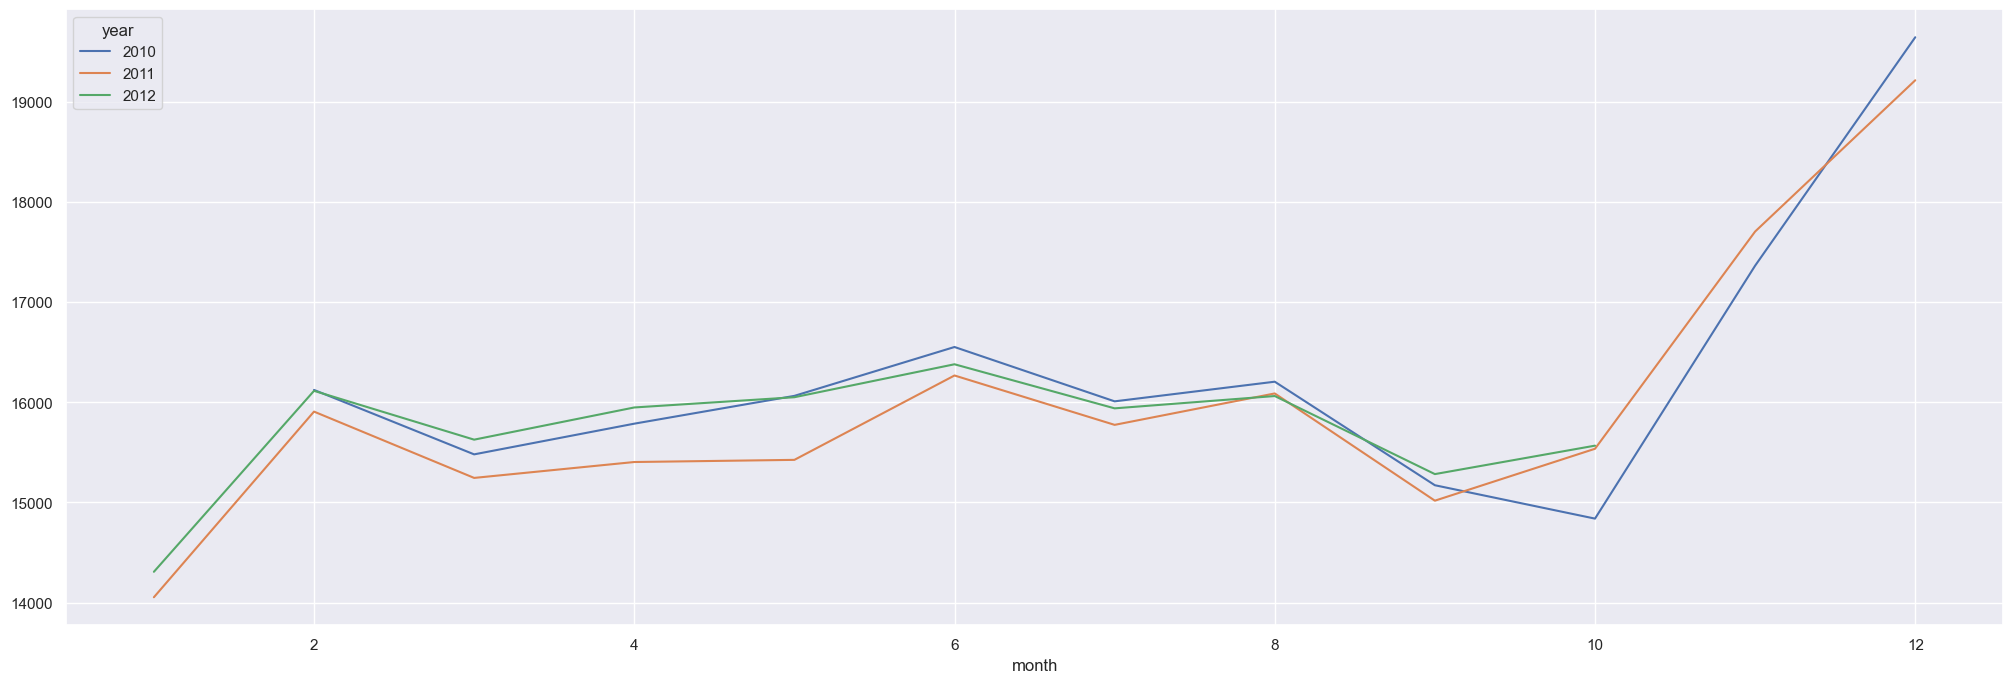

In [26]:
month_wise_sales = pd.pivot_table(traindf5, values = "Weekly_Sales", columns = "year", index = "month")
month_wise_sales.plot()

**Label encoding for Holiday column and Type**

In [27]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
traindf5['IsHoliday']= label_encoder.fit_transform(traindf5['IsHoliday'])
traindf5['Type']= label_encoder.fit_transform(traindf5['Type'])

traindf5


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,2
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,2
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,2
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,2
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,9
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,10
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,10
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,10


**Correlation Map 2**

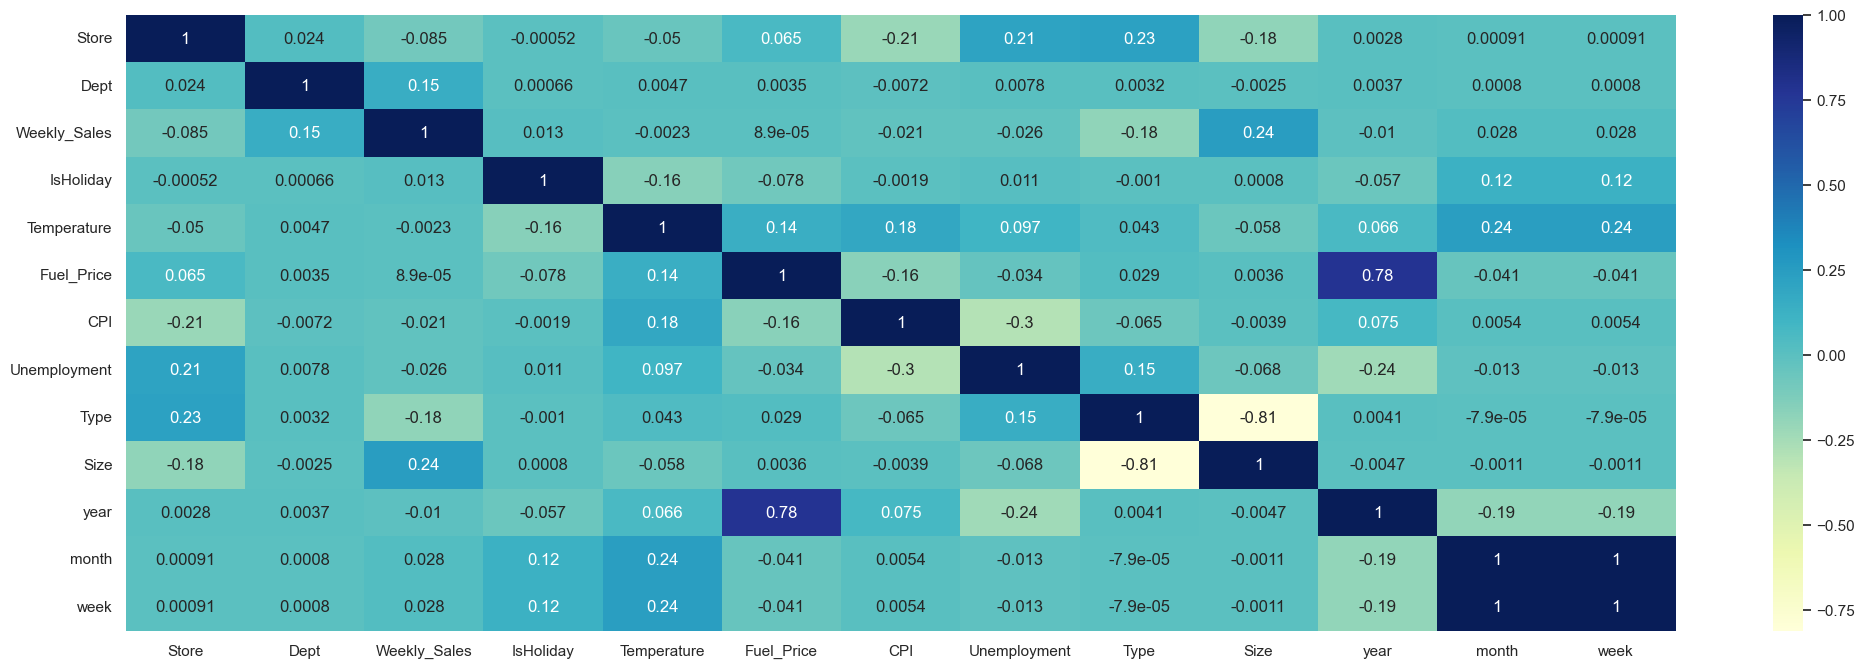

In [28]:
data = traindf5

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
data.corr()
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()


**Feature Importance Test using various techniques**

In [29]:
from sklearn.ensemble import RandomForestRegressor
# import shap

In [30]:
Features=traindf5.drop(['Weekly_Sales'],axis=1)
Target=traindf5['Weekly_Sales']

In [31]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(Features,Target)

RandomForestRegressor()

In [32]:
Features

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,2
1,1,1,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,2
2,1,1,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,2
3,1,1,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,2
4,1,1,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,9
421566,45,98,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,10
421567,45,98,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,10
421568,45,98,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,10


<BarContainer object of 12 artists>

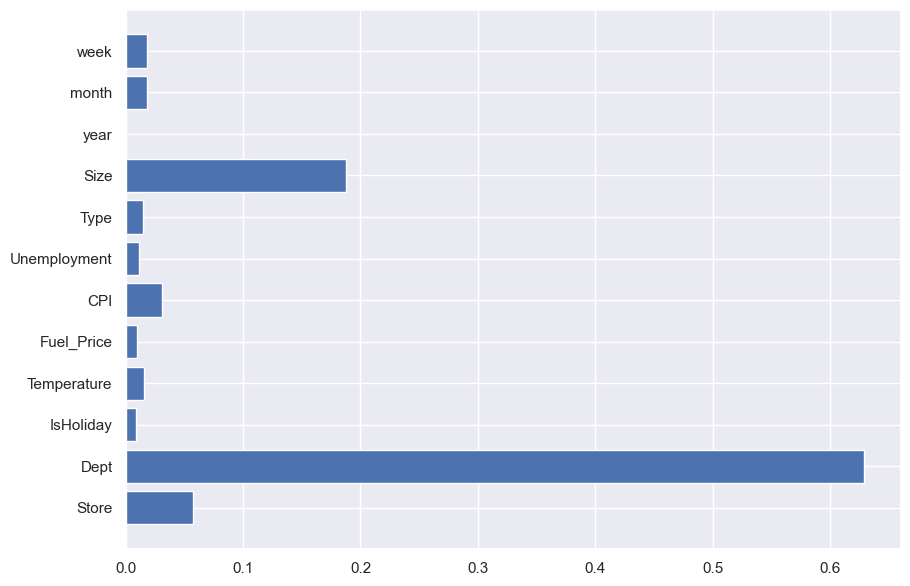

In [33]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.barh(Features.columns, rf.feature_importances_)


In [34]:
F=Features.drop(["IsHoliday",'year'],axis=1)

In [35]:
F

,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,month,week
0,1,1,42.31,2.572,211.096358,8.106,0,151315,2,2
1,1,1,38.51,2.548,211.242170,8.106,0,151315,2,2
2,1,1,39.93,2.514,211.289143,8.106,0,151315,2,2
3,1,1,46.63,2.561,211.319643,8.106,0,151315,2,2
4,1,1,46.50,2.625,211.350143,8.106,0,151315,3,3
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,64.88,3.997,192.013558,8.684,1,118221,9,9
421566,45,98,64.89,3.985,192.170412,8.667,1,118221,10,10
421567,45,98,54.47,4.000,192.327265,8.667,1,118221,10,10
421568,45,98,56.47,3.969,192.330854,8.667,1,118221,10,10


In [36]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(F, Target, test_size= 0.25, random_state=0)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [38]:
DTRmodel = DecisionTreeRegressor(max_depth=3,random_state=0)
DTRmodel.fit(x_train,y_train)
y_pred = DTRmodel.predict(x_test)

In [39]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.3796166061691
MSE score  : 323184793.8287025
RMSE:  17977.34112233237


In [40]:
rf1 = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35, max_features = 'sqrt',min_samples_split = 10)
rf1.fit(x_train,y_train)
y_pred1 = rf1.predict(x_test)

In [41]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred1))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred1)))

R2 score  : 0.3796166061691
MSE score  : 69521027.7789905
RMSE:  8337.927067262612


In [42]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
y_pred2 = model.predict(x_test)

In [44]:
print("R2 score  :",r2_score(y_test, y_pred2))
print("MSE score  :",mean_squared_error(y_test, y_pred2))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred2)))

R2 score  : 0.9271340559946372
MSE score  : 37959051.32967799
RMSE:  6161.091731964229


In [45]:
y_pred2

array([26833.182 ,  -830.0707, 44723.36  , ...,  8591.104 ,  3560.6003,
        9699.195 ], dtype=float32)

In [46]:
#Regularization
from sklearn.linear_model import Ridge
rr_model = Ridge(alpha=0.5)
rr_model.fit(x_train,y_train)

Ridge(alpha=0.5)

In [47]:
y_pred3 = model.predict(x_test)

In [48]:
y_pred3

array([26833.182 ,  -830.0707, 44723.36  , ...,  8591.104 ,  3560.6003,
        9699.195 ], dtype=float32)

In [49]:
print("R2 score  :",r2_score(y_test, y_pred3))
print("MSE score  :",mean_squared_error(y_test, y_pred3))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred3)))

R2 score  : 0.9271340559946372
MSE score  : 37959051.32967799
RMSE:  6161.091731964229


In [50]:
y_test

198556    18526.46
342491       84.00
267645    27025.56
169044    48324.54
45102      2968.68
            ...   
323292     4156.69
22041     15252.97
261294     8461.31
212048      835.99
406506     6728.27
Name: Weekly_Sales, Length: 105053, dtype: float64

In [51]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred4=model.predict(x_test)


In [52]:
y_pred4

array([11758.59007626, -1243.27816466, 17761.39283793, ...,
       19828.92779923, 15084.57342127,  4757.67375645])

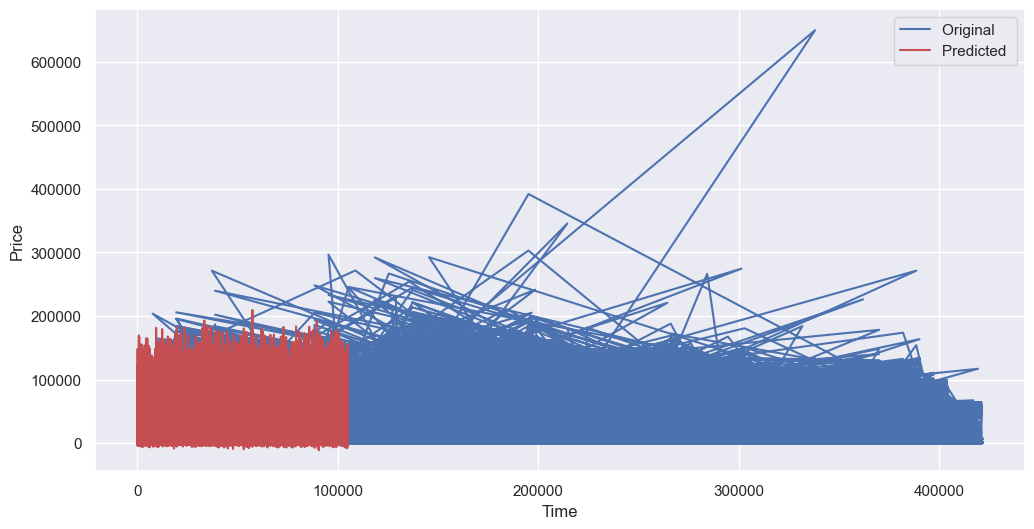

In [53]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original ')
plt.plot(y_pred3, 'r', label = 'Predicted ')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()